In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import nltk
from statistics import mean
from collections import Counter

In [74]:
# read in data - here I took the same categories as we had in the lesson
categories = ['soc.religion.christian', 'comp.graphics', 'sci.med', 'comp.windows.x', 'sci.space', 'alt.atheism']
newsgroup_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True)
newsgroup_test = fetch_20newsgroups(subset='test', categories=categories)

In [75]:
# add stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['find','would','be','one','say','made','think','subject','see','fnal','articl','feel','given','led',
                  'view','way','either','however','yet'])
print(stop_words)

{'any', 'there', 'does', 'aren', 'no', 'whom', 'won', 'articl', 'these', 'which', 'to', 'doesn', 'at', 'but', 'against', 'before', 'when', 'he', 'are', 'o', 'her', 'see', 'or', 'this', 'himself', 'did', 'hers', 'had', 'own', 'i', 'same', "don't", 's', 'for', 'given', "you'd", 'yours', 'weren', 'feel', 'haven', 'once', 'through', 'here', 'me', 'by', 'm', "won't", 'off', 'mightn', "should've", 'down', "needn't", 'think', 't', 'view', 'you', 'as', 'him', 'it', 'because', 'where', 'only', 'she', "doesn't", 'were', 'most', 'they', 'say', 'too', 'll', 'if', "weren't", 'ma', "didn't", 're', 'ours', 'other', 'isn', 'between', 'the', 'those', 'find', 'y', 'and', 'each', 'his', 'in', 'both', 'over', "haven't", 'until', 'more', 'itself', 'be', 'ain', 'either', 'after', "aren't", 'should', 'wasn', 'up', "hasn't", 'ourselves', 'above', 'will', 'below', 'nor', 'shouldn', 'now', "couldn't", 'yourselves', 'then', 'yet', 'from', "that'll", 'their', "you're", 'your', 'having', 'all', 'couldn', 'so', 'su

In [77]:
# get rid of stop words
# stemming
ps = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')

newsgroup_trainN = []
i = 0
for message in newsgroup_train.data:
    text_token = tokenizer.tokenize(message)
    messageN = ''
    for word in text_token:
        word = word.lower()
        if word not in stop_words:
            messageN = messageN + ' ' + word
    newsgroup_trainN.append(messageN)
newsgroup_train.data = newsgroup_trainN

In [78]:
# comparison vocabulary with and without stemming
# tokenize words
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(newsgroup_train.data)

# get size of vocabulary 
# 1 needs to be added because of reserve 0 index
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

47668


In [79]:
# count number of words
number_words_wo_stem = []
for message in newsgroup_train.data:
    count = len(message.split())
    number_words_wo_stem.append(count)

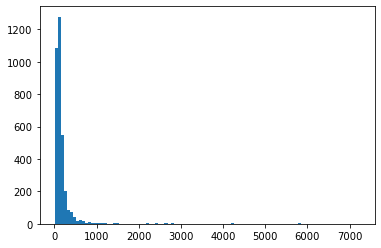

In [81]:
# plot histogram without stemming
plt.hist(number_words_wo_stem,bins=100)
plt.show()

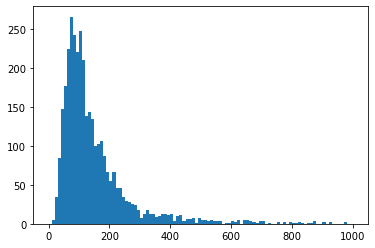

In [82]:
plt.hist(number_words_wo_stem,bins=100,range=(0,1000))
plt.show()

In [83]:
print("Average number of words:")
print(mean(number_words_wo_stem))

Average number of words:
189.64246296834156


In [84]:
# get rid of stop words
# do stemming
ps = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')

newsgroup_trainN = []
i = 0
for message in newsgroup_train.data:
    text_token = tokenizer.tokenize(message)
    messageN = ''
    for word in text_token:
        word = word.lower()
        if word not in stop_words:
            messageN = messageN + ' ' + ps.stem(word)
    newsgroup_trainN.append(messageN)
newsgroup_train.data = newsgroup_trainN

In [85]:
# comparison vocabulary with and without stemming
# tokenize words
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(newsgroup_train.data)

# get size of vocabulary 
# 1 needs to be added because of reserve 0 index
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

37279


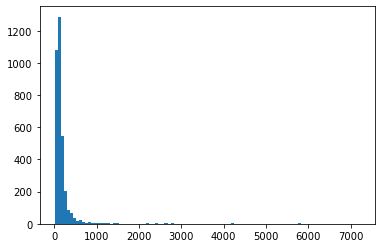

In [86]:
# plot histogram with stemming
plt.hist(number_words_w_stem, bins=100)
plt.show()

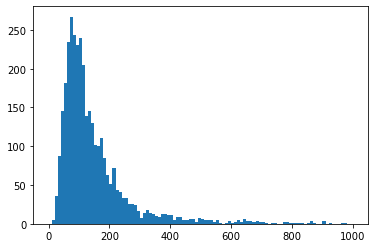

In [69]:
plt.hist(number_words_w_stem,bins=100,range=(0,1000))
plt.show()

In [70]:
print("Average number of words:")
print(mean(number_words_w_stem))

Average number of words:
188.33604414754575


In [71]:
# comparison vocabulary with and without stemming
# tokenize words
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(newsgroup_train.data)

# get size of vocabulary 
# 1 needs to be added because of resrver 0 index
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

37279


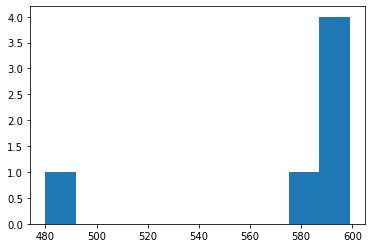

In [72]:
# overview
c = Counter(newsgroup_train.target)
number_categories = c.values()
plt.hist(number_categories)
plt.show()